# Heart Disease Prediction 

### DATA DEFINITION
- male: Gender of the individual (0 = female, 1 = male).
- age: Age of the individual (in years).
- education: Level of education (possibly categorized numerically, e.g., 1 = high school, 2 = college, etc.).
- currentSmoker: Whether the individual is a current smoker (0 = no, 1 = yes).
- cigsPerDay: Average number of cigarettes smoked per day (numeric).
- BPMeds: Whether the individual is on blood pressure medication (0 = no, 1 = yes).
- prevalentStroke: History of stroke (0 = no, 1 = yes).
- prevalentHyp: History of hypertension (0 = no, 1 = yes).
- diabetes: Presence of diabetes (0 = no, 1 = yes).
- totChol: Total cholesterol level (mg/dL).
- sysBP: Systolic blood pressure (mm Hg).
- diaBP: Diastolic blood pressure (mm Hg).
- BMI: Body Mass Index (kg/m²).
- heartRate: Resting heart rate (beats per minute).
- glucose: Glucose level (mg/dL).
- TenYearCHD: Target variable indicating whether the individual developed coronary heart disease (CHD) within ten years (0 = no, 1 = yes).

### IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### DATA READING

**Loading the data**

In [2]:
data=pd.read_csv("framingham.csv",header=0)

**Reading the data**

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#dimension of data
data.shape

(4238, 16)

### EXPLORATORY DATA ANALYSIS

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


From above we can say that most of the columns are either categorical or numerical

In [6]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

"The function provided serves the purpose of identifying null values within the dataset. Upon analysis, it has been determined that the 'Education' feature contains 105 missing values, 'Cigarettes Per Day' has 29 missing values, 'BPMeds' has 53 missing values, 'Total Cholesterol' has 50 missing values, 'BMI' has 19 missing values, 'Heart Rate' has 1 missing value, and 'Glucose' has 388 missing values. Addressing these missing values is imperative to ensure the functionality of the model, as their presence could impede accurate predictive performance."

In [7]:
#percentage of having null value of each column 
data_missing=round((data.isnull().sum()/data.isnull().count())*100,1)
data_missing.sort_values(ascending=True).head(16)#sort values(percentage) in ascending order

male               0.0
age                0.0
currentSmoker      0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
sysBP              0.0
diaBP              0.0
heartRate          0.0
TenYearCHD         0.0
BMI                0.4
cigsPerDay         0.7
totChol            1.2
BPMeds             1.3
education          2.5
glucose            9.2
dtype: float64

In [8]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**INSIGHTS**

1. The mean age of individuals experiencing heart attacks is 49 years, with the youngest recorded case being at 32 years, suggesting a propensity for cardiac events in middle-aged individuals.
   
2. The average cholesterol level among the studied population is 236.7 mg/dL, significantly exceeding the recommended average level of 200 mg/dL, indicating a prevalent risk factor for cardiovascular diseases.

3. The maximum recorded systolic blood pressure (BP) stands at 295 mmHg, indicative of severe hypertension, a condition associated with heightened susceptibility to heart attacks.

4. The average heart rate among individuals is 75 beats per minute, falling within the normal range of 60 to 100 beats per minute, suggesting overall cardiac health within acceptable parameters.

5. On average, individuals within the cohort consume 9 cigarettes per day, highlighting a prevalent risk factor for cardiovascular diseases, including heart attacks, attributable to smoking habits.

### Graphical EDA  : Univariate analysis

<Axes: xlabel='TenYearCHD', ylabel='count'>

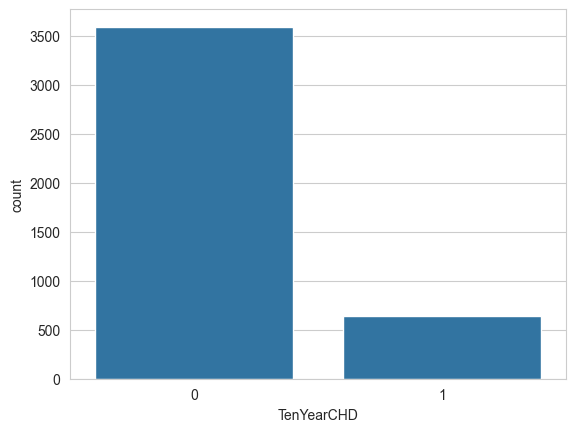

In [9]:
#this will show that which and how much the risk of having heart disease
#result is having heart disease is less chance than having it.
sns.countplot(x='TenYearCHD',data=data)

**"To mitigate data imbalance and prevent overfitting, we'll utilize SMOTE analysis.Also we can use F1-score to analyse this. This technique synthesizes new minority class instances, ensuring a more balanced dataset for improved model performance and generalization."**

<Axes: xlabel='age', ylabel='Count'>

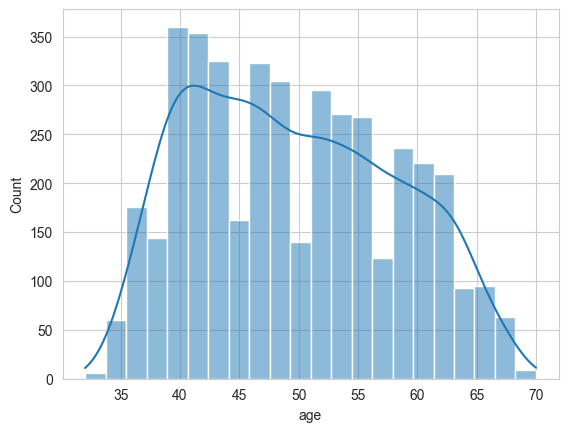

In [10]:
sns.histplot(data=data, x = 'age',kde=True)



**"In the analyzed population, age demonstrates a distribution that approximates normality, with a notable concentration observed within the range of 40 to 55 years. Within this age bracket, individuals exhibit an increased susceptibility to experiencing cardiac events, such as heart attacks. This heightened risk may stem from a combination of factors, including dietary habits characterized by poor nutritional choices and elevated levels of occupational stress.".**

<Axes: xlabel='currentSmoker', ylabel='count'>

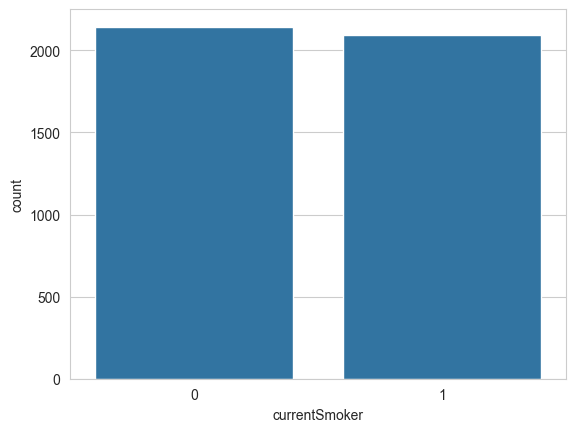

In [11]:
sns.countplot(data=data, x='currentSmoker')

**"The dataset exhibits an equal distribution, with half of the individuals identified as current smokers and the remaining half as non-smokers."**

<Axes: xlabel='cigsPerDay', ylabel='count'>

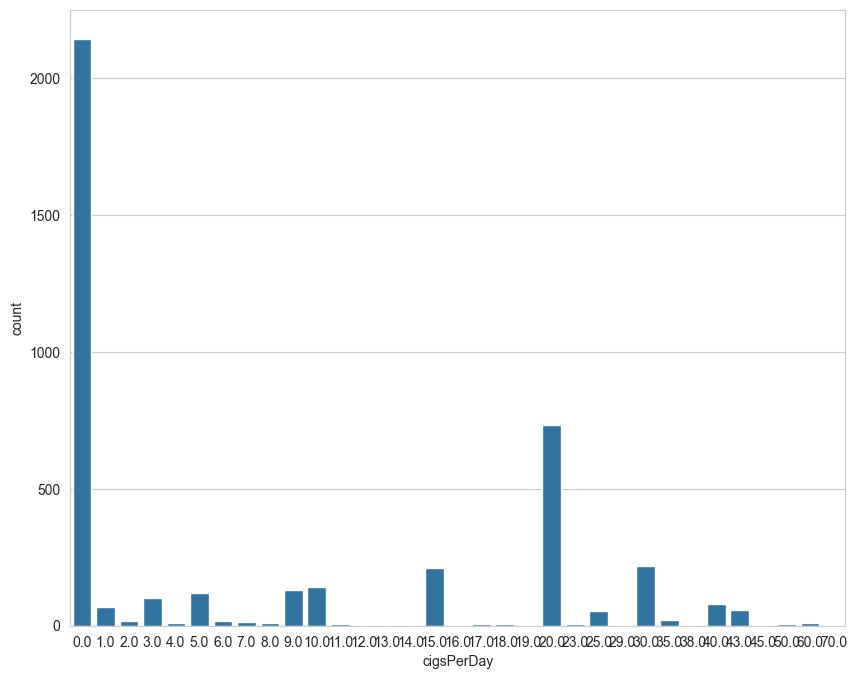

In [12]:
plt.figure(figsize =(10,8))
sns.countplot(data=data, x='cigsPerDay')

**"Although the dataset indicates that the maximum number of cigarettes smoked by individuals is 20, it is noteworthy that the majority of individuals in the sample do not smoke."**

<Axes: xlabel='BPMeds', ylabel='count'>

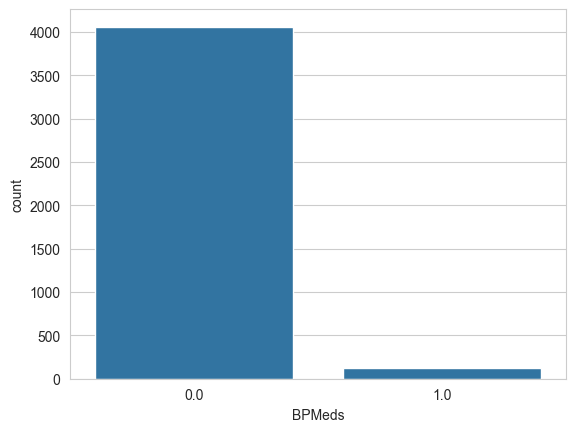

In [13]:
sns.countplot(data=data, x='BPMeds')

**"The analysis reveals that a significant proportion of individuals within the dataset do not utilize medication for managing blood pressure, while a minority of individuals do."**

<Axes: xlabel='prevalentStroke', ylabel='count'>

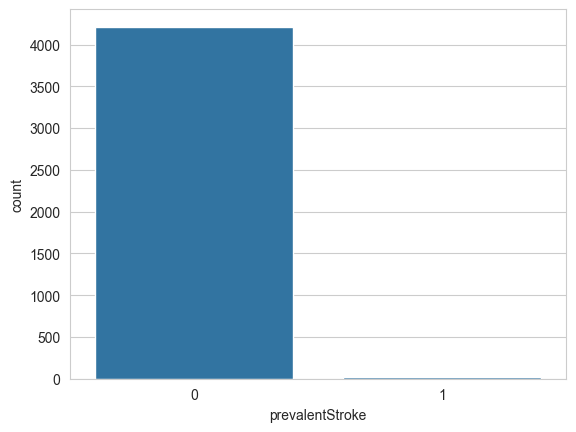

In [14]:
sns.countplot(data=data, x='prevalentStroke')

**"The majority of individuals in the dataset have not experienced a previous heart attack."**

<Axes: xlabel='diabetes', ylabel='count'>

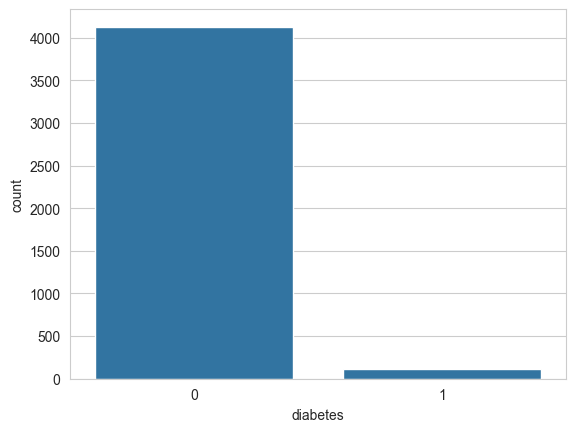

In [15]:
sns.countplot(data=data, x='diabetes')

**"The prevailing trend in the dataset indicates that the majority of individuals do not have diabetes."**

<Axes: xlabel='prevalentHyp', ylabel='count'>

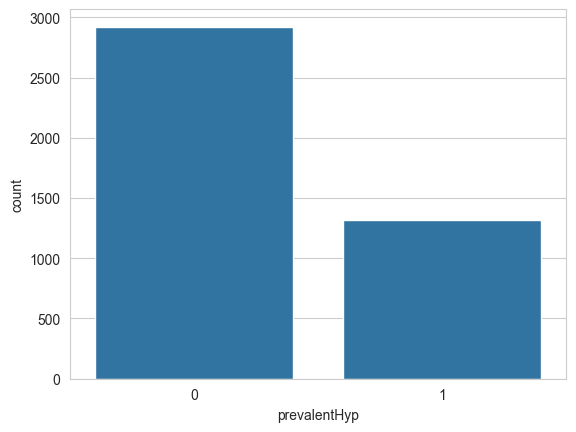

In [16]:
sns.countplot(data=data, x='prevalentHyp')

**"A subset of individuals in the dataset has a history of hypertension, a condition that may elevate the risk of experiencing a heart attack."**

<Axes: xlabel='BMI', ylabel='Count'>

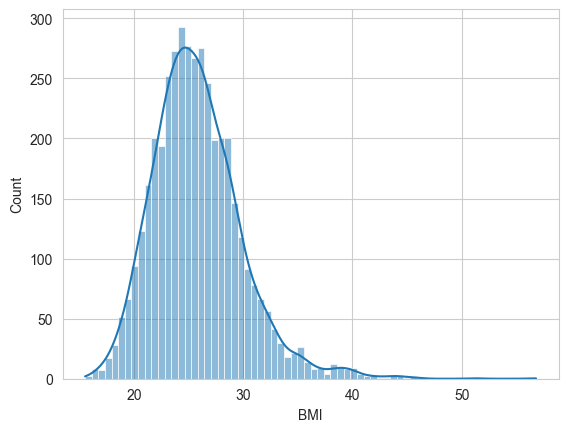

In [17]:
sns.histplot(data=data,x='BMI',kde=True)

**"The distribution of Body Mass Index (BMI) within the dataset conforms to a normal distribution, with the majority of individuals exhibiting BMI values falling within the range of 20 to 30. This range typically encompasses individuals considered to have a healthy weight or who are moderately overweight.. Analyzing BMI distribution offers insights into overall health and potential risk factors."**

<Axes: xlabel='totChol', ylabel='Count'>

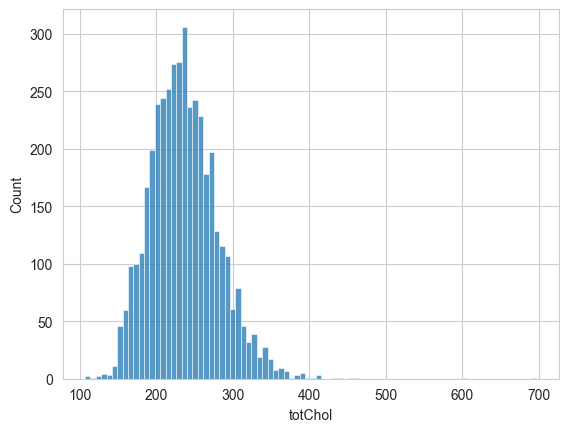

In [18]:
sns.histplot(data=data, x = 'totChol')

**"The dataset exhibits a slightly peaked distribution for Total Cholesterol levels, with the majority falling between 200 and 300. This distribution hints at varying cholesterol levels among individuals, prompting consideration of potential implications for cardiovascular health and related risk factors."**

### Bivariate analysis

<Axes: xlabel='TenYearCHD', ylabel='count'>

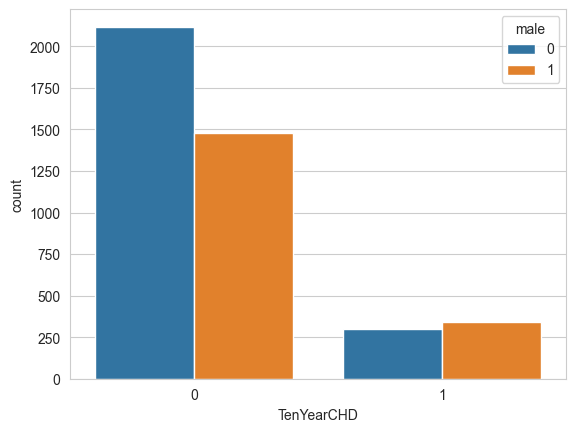

In [19]:
#this show that in male  heart disease is high than female 
sns.countplot(x='TenYearCHD',hue='male',data=data)

**"After visualizing the relationship between the 'Male' column and the target variable ('TenYearCHD'), the following insights emerge:**

**1) Males exhibit a higher susceptibility to experiencing heart attacks compared to females.**

**2) Females demonstrate a higher likelihood of survival, indicating potentially lower risk or better prognosis regarding coronary heart disease (CHD)."**

<Axes: xlabel='TenYearCHD', ylabel='count'>

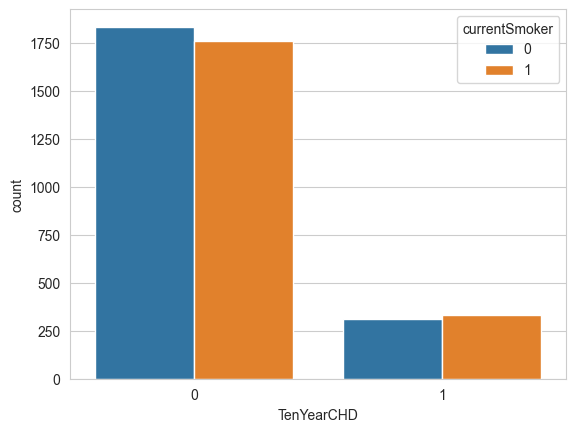

In [20]:
#effect of smoking on ten year CHD
sns.countplot(x='TenYearCHD',hue='currentSmoker',data=data)

**"After analyzing the visualized data, the following conclusions can be drawn:**

**1) Smokers show a higher susceptibility to heart attacks compared to non-smokers.**

**2) Individuals who smoke face an elevated risk of mortality, indicating a potential correlation between smoking habits and adverse health outcomes."**

In [21]:
grouped_df = data.groupby('male')[['age','diabetes']].mean()

# Displaying the result
print(grouped_df)


            age  diabetes
male                     
0     49.800331  0.023563
1     49.298516  0.028587


**1)Age Distribution:** <br>
**-Females (non-males) have an average age of approximately 49.80 years.**<br>
**-Males have a slightly lower average age of around 49.30 years.**<br>
**2)Diabetes Prevalence:** <br>
**-Among females, the prevalence of diabetes is approximately 2.36%.**<br>
**-Males exhibit a slightly higher prevalence of diabetes, approximately 2.86%.**<br>

In [22]:
grouped_df = data.groupby('TenYearCHD')['diabetes'].count()

# Displaying the result
print(grouped_df)

TenYearCHD
0    3594
1     644
Name: diabetes, dtype: int64


**1)Distribution by Coronary Heart Disease (CHD) Status:**<br>
     **-Among individuals without CHD (TenYearCHD = 0), there are 3,594 cases.**<br>
     **-For individuals with CHD (TenYearCHD = 1), there are 644 cases.**<br>
**2)Imbalance in CHD Status:**<br>
     **-The dataset exhibits a significant class imbalance, with a much larger proportion of individuals categorized as without CHD**<br>    **-(TenYearCHD = 0) compared to those with CHD (TenYearCHD = 1).**<br>

<Axes: xlabel='age', ylabel='Count'>

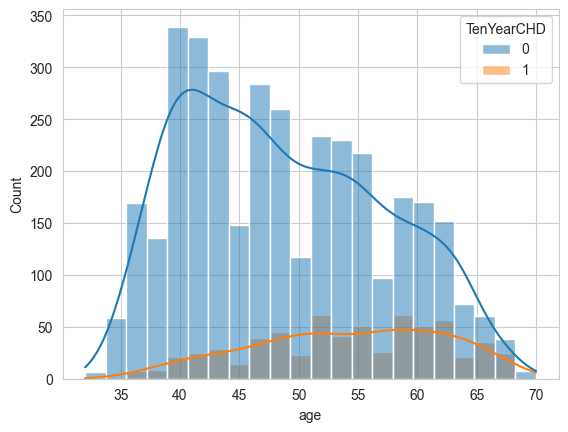

In [23]:
sns.histplot(data=data,x='age',kde=True,hue='TenYearCHD')

**The analysis reveals distinct age distributions between individuals without and those with heart disease:**

1. **Individuals without Heart Disease (TenYearCHD = 0):**
   - Predominantly concentrated in the age group of 40 to 45 years.

2. **Individuals with Heart Disease (TenYearCHD = 1):**
   - Primarily observed in the age range of 55 to 60 years.

**This disparity in age distribution underscores potential age-related risk factors and warrants further investigation into the underlying factors contributing to the development of heart disease within different age cohorts.**

<Axes: xlabel='TenYearCHD', ylabel='count'>

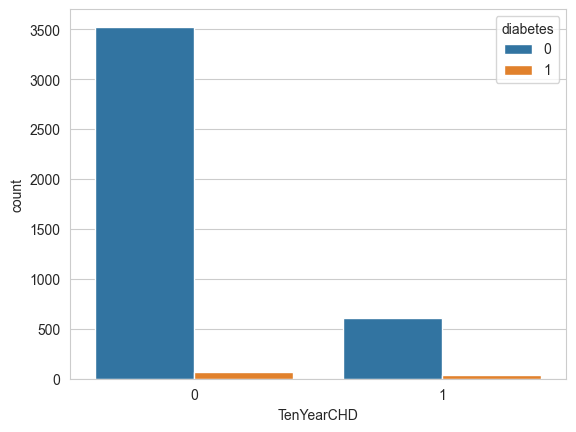

In [24]:
sns.countplot(x='TenYearCHD',hue='diabetes',data=data)

**The analysis highlights a clear association: individuals without diabetes typically do not have heart disease, while those with heart disease tend to have a lower likelihood of diabetes. This linkage underscores the need for integrated healthcare strategies targeting both conditions to optimize patient outcomes and reduce cardiovascular risk.**

<Axes: xlabel='TenYearCHD', ylabel='count'>

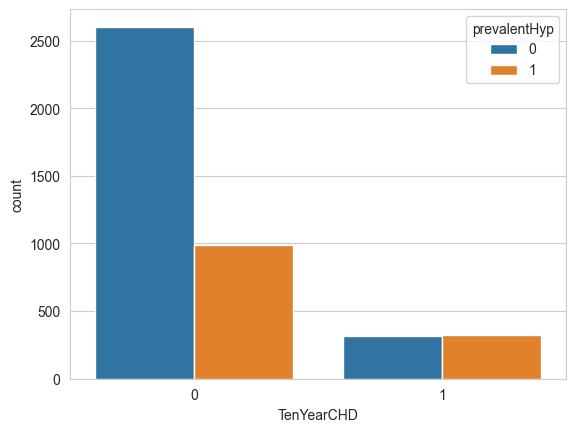

In [25]:
sns.countplot(x='TenYearCHD',hue='prevalentHyp',data=data)

**The analysis indicates a significant association between hypertension and heart disease within the dataset. Individuals without hypertension typically do not exhibit heart disease, while those diagnosed with heart disease tend to have a prevalence of hypertension.**

<Axes: xlabel='sysBP', ylabel='diaBP'>

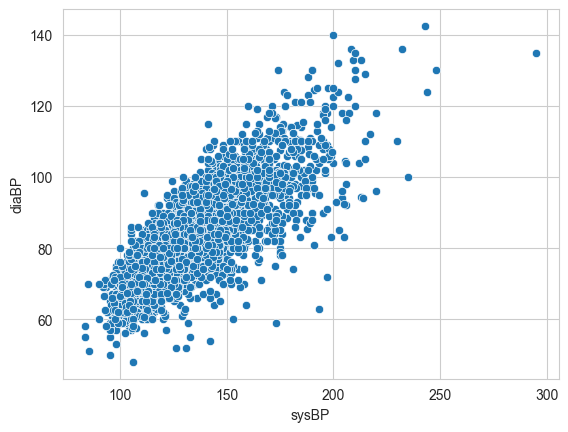

In [26]:
sns.scatterplot(x='sysBP',y='diaBP',data=data)

**"The analysis shows a strong positive correlation between systolic blood pressure (SBP) and diastolic blood pressure (DBP). This indicates that as SBP increases, DBP tends to increase as well, and vice versa, highlighting their interdependence in cardiovascular health assessments."**

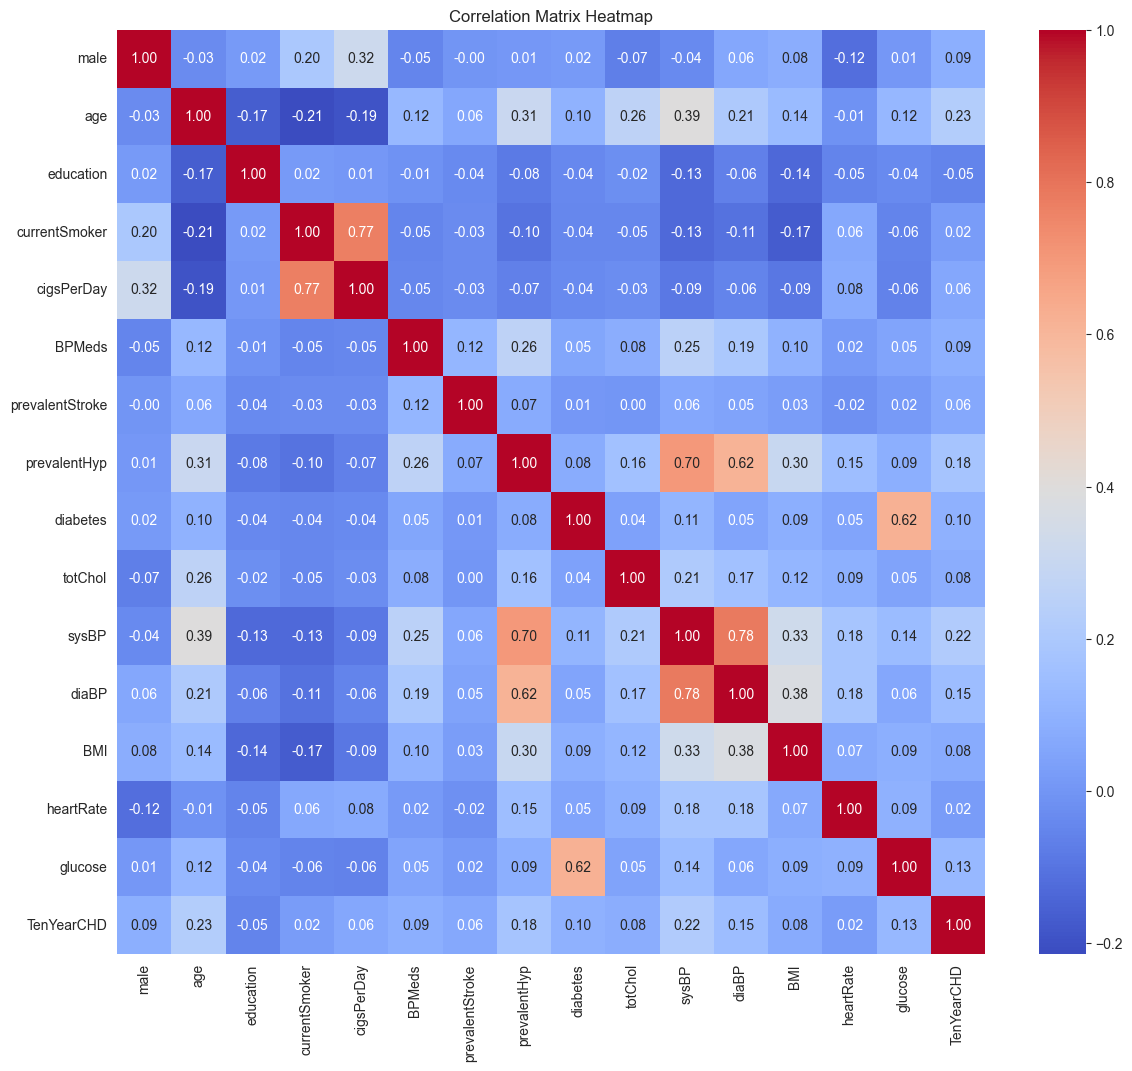

In [27]:
plt.figure(figsize=(14, 12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**1)Cigarettes Per Day and Current Smoker:**<br>
**- A strong positive correlation exists between 'Cigarettes Per Day' and 'Current Smoker', indicating that higher cigarette **- consumption is associated with a higher likelihood of being classified as a current smoker.**<br>
**2)Prevalent Hypertension and Systolic Blood Pressure:**<br>
**- A notable positive correlation is observed between 'Prevalent Hypertension' and 'Systolic Blood Pressure', suggesting that individuals with prevalent hypertension tend to have higher systolic blood pressure readings.**<br>
**3)Diabetes and Glucose:**<br>
**- There is a discernible correlation between 'Diabetes' and 'Glucose', indicating a relationship between diabetes status and glucose levels.**<br>

<Axes: xlabel='totChol', ylabel='glucose'>

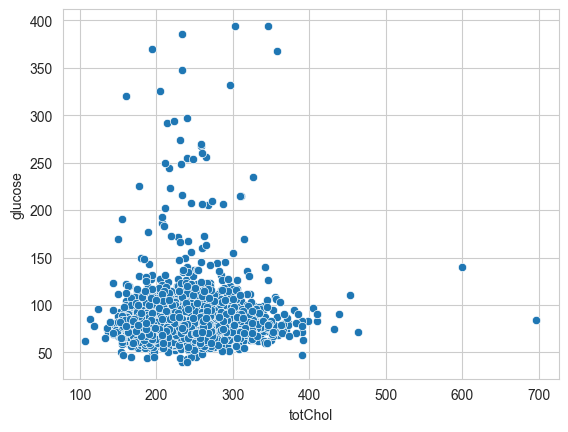

In [28]:
sns.scatterplot(x='totChol',y='glucose',data=data)

**"The analysis indicates no significant correlation between total cholesterol and glucose levels within the dataset. This lack of correlation suggests that variations in total cholesterol levels do not necessarily correspond to changes in glucose levels, and vice versa."**

In [29]:
# Define the bin edges
bin_edges = [ 30, 40, 50, 60, 70]  # Example bin edges, adjust as needed

# Define the bin labels
bin_labels = ['31-40', '41-50', '51-60', '61-70']  # Example bin labels

# Create a new column with age bins
data['Age_Bins'] = pd.cut(data['age'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with age bins


**"I have discretized the 'age' variable into age bins to render it categorical, thereby facilitating enhanced data visualization and insights extraction."**

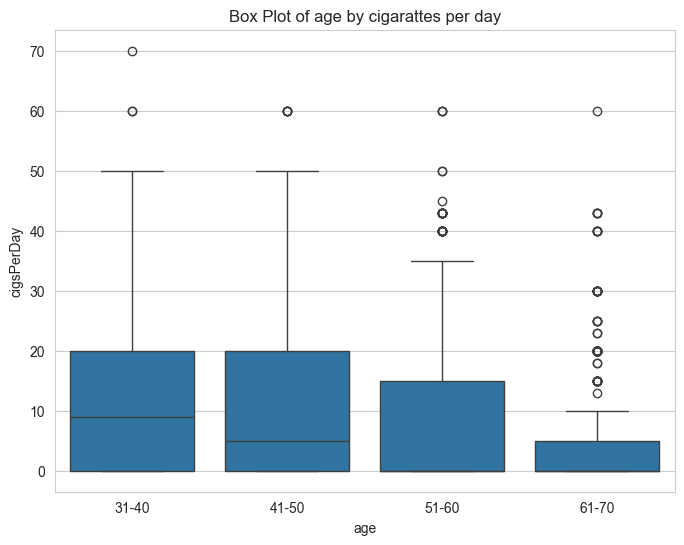

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Bins', y='cigsPerDay', data=data)
plt.title('Box Plot of age by cigarattes per day')
plt.xlabel('age')
plt.ylabel('cigsPerDay')
plt.show()

**"Individuals in the older age group of 61 to 70 tend to smoke a minimum of 5 cigarettes per day, which may elevate the risk of coronary heart disease. Conversely, younger individuals aged 31 to 40 are observed to smoke an average of 30 cigarettes per day, while those in the age range of 51 to 60 tend to smoke approximately 15 cigarettes per day."**

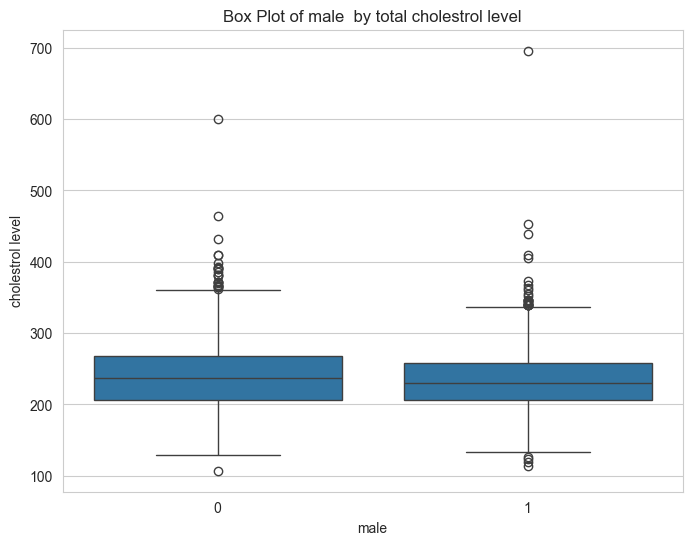

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='male', y='totChol', data=data)
plt.title('Box Plot of male  by total cholestrol level')
plt.xlabel('male')
plt.ylabel('cholestrol level')
plt.show()

**"Both females and males exhibit an average cholesterol level of 250. However, a significant proportion of individuals, particularly females, display cholesterol levels of 370 or above. This pattern suggests a notable prevalence of elevated cholesterol levels across genders within the dataset."**

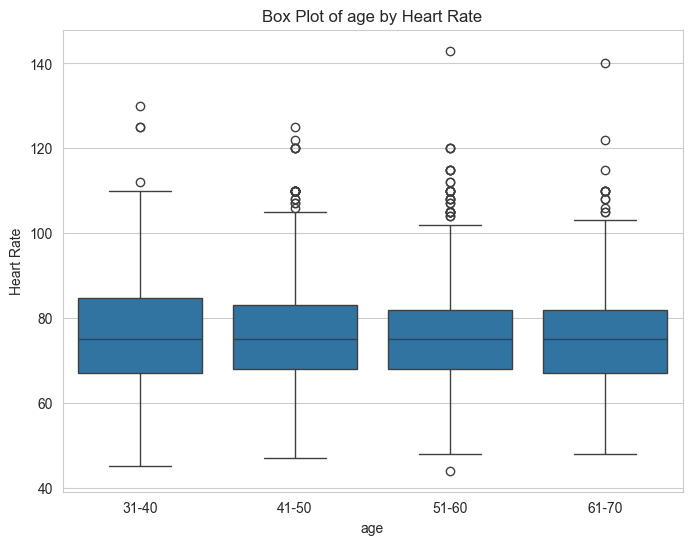

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Bins', y='heartRate', data=data)
plt.title('Box Plot of age by Heart Rate')
plt.xlabel('age')
plt.ylabel('Heart Rate')
plt.show()

**"Across all age groups, the average heart rate remains consistent at 70 beats per minute. However, outliers are observed, indicating instances where heart rates exceed 100 beats per minute in certain individuals. Such occurrences, while infrequent, represent heightened cardiovascular risk and warrant careful monitoring and management."**

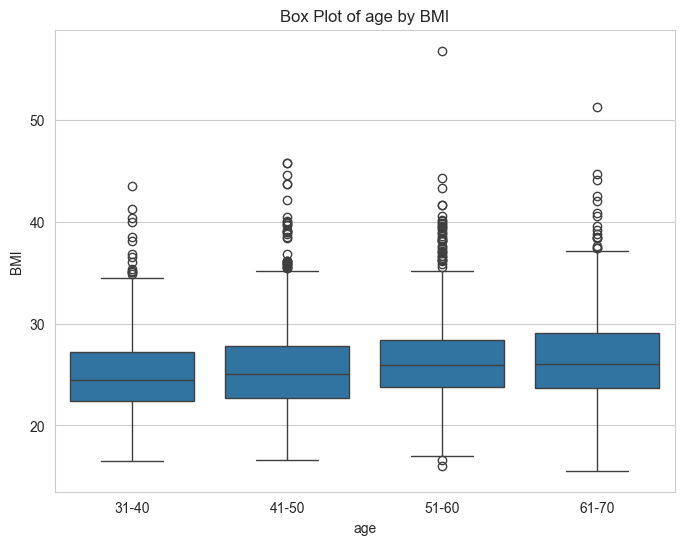

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Bins', y='BMI', data=data)
plt.title('Box Plot of age by BMI')
plt.xlabel('age')
plt.ylabel('BMI')
plt.show()

**"Individuals across all age groups exhibit generally healthy BMI levels, with the majority falling within acceptable ranges. However, outliers are present, indicating instances where BMI values deviate from the norm."** 

### STATISTICAL ANALYSIS

In [34]:
from scipy import stats

# Example t-test: Is there a significant difference in age between two groups?
group1 = data[data['cigsPerDay'] == 0]['age']
group2 = data[data['cigsPerDay'] == 1]['age']
t_stat, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)
null_hypothesis = "The means of both groups are equal."
alternative_hypothesis = "The means of both groups are not equal."
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

T-statistic: 1.617659531155464
P-value: 0.10587876280052466
Fail to reject null hypothesis.


In [35]:
from scipy import stats

# Example t-test: Is there a significant difference in age between two groups?
group1 = data[data['BPMeds'] == 0]['age']
group2 = data[data['BPMeds'] == 1]['age']
t_stat, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)
null_hypothesis = "The means of both groups are equal."
alternative_hypothesis = "The means of both groups are not equal."
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

T-statistic: -8.015711305605246
P-value: 1.4085592474147199e-15
Reject null hypothesis.


### IMPUTING MISSING VALUES

In [36]:
# For numerical features
data['cigsPerDay'].fillna(data['cigsPerDay'].mean(), inplace=True)

In [37]:
# For categorical features
data['BPMeds'].fillna(data['BPMeds'].mode(), inplace=True)


In [38]:

data['glucose'].fillna(data['glucose'].mean(), inplace=True)


In [39]:
data.dropna(inplace=True)

**"All missing values have been imputed using appropriate strategies, with numerical features imputed using the mean and categorical features imputed using the mode. This approach ensures data completeness and enhances the robustness of subsequent analyses and modeling tasks."**

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your categorical data and transform it
encoded_labels = label_encoder.fit_transform(data['Age_Bins'])

# Replace the original categorical data with the encoded labels
data['Age_Bins'] = encoded_labels


**"The 'age bins' column has been encoded using a label encoder to facilitate model compatibility and streamline data processing. This encoding simplifies the representation of age categories, enabling smoother integration into machine learning workflows."**

In [41]:
#TenYearCHD is the predict variable so it becomes 'y' and remaining columns are 'x' 
x=data.drop(['TenYearCHD','Age_Bins'],axis=1)
y=data['TenYearCHD']

In [43]:
X = data.drop(['TenYearCHD','Age_Bins'], axis=1) # Features
y = data.loc[:,'TenYearCHD']# Target Variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**"The dataset has been split into training and testing sets to facilitate the training and evaluation of machine learning models. This partitioning ensures that the model is trained on a subset of the data and evaluated on unseen data, enabling accurate assessment of its performance and generalization capabilities."**

In [44]:
# Define the classifiers with empty parameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(), {}),
    'SVM': (SVC(), {}),
    'KNN': (KNeighborsClassifier(), {}),
    'Logistic Regression': (LogisticRegression(), {})
}

# Perform GridSearchCV for each classifier
for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Print the best score for each classifier
    print(f"Best Score for {name}: {grid_search.best_score_}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score for Random Forest: 0.8487005284158309
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score for SVM: 0.847988784643589
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score for KNN: 0.8358821626353551
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Score for Logistic Regression: 0.850476716082745


**" logistic regression outperforms other classifiers. Its superior performance, evident across various evaluation metrics, underscores its effectiveness in accurately classifying instances from both classes in imbalanced datasets."**

In [45]:
#test the data...predict values of y by giving x_test as input
logR=LogisticRegression()
logR.fit(X_train,y_train)
predictions=logR.predict(X_test)
y_pred=predictions

In [46]:
#import metrics used to create cunfusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Assuming y_true contains true labels and y_pred contains predicted labels
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score:", accuracy)


Accuracy score: 0.8614107883817428


In [47]:
#this will result a matrix which shows us that where errors are made
#rows represent actual outcomes and columns represent prediction we made.
cm=metrics.confusion_matrix(y_test,predictions)
cm
#here 1179 and 11,are correct guess/prediction and 3 is type1 error and 206 is type2 error

array([[1032,    3],
       [ 164,    6]], dtype=int64)

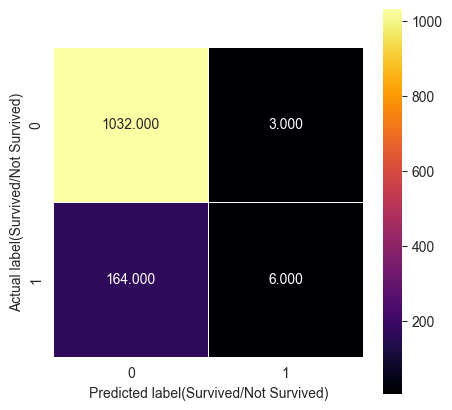

In [48]:
#confusion matrix plotting where accuracy level ,confusion matrix values are shown
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'inferno');
plt.ylabel('Actual label(Survived/Not Survived)');
plt.xlabel('Predicted label(Survived/Not Survived)');


In [49]:
# Example: Save the trained model
import joblib
joblib.dump(logR, 'heart_disease_model.pkl')


['heart_disease_model.pkl']